<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/logistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class ScratchLogisticRegression():
    def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False,lam=0.1):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = []
        self.val_loss = []


    def fit(self, X, y, X_val, y_val):
      if self.bias == True:
        bias = np.ones((X.shape[0], 1))
        X = np.hstack((bias, X))
        bias = np.ones((X_val.shape[0], 1))
        X_val = np.hstack((bias, X_val))
      self.theta = np.zeros(X.shape[1])
      self.theta = self.theta.reshape(X.shape[1], 1)
      for i in range(self.num_iter):
        pred = self._logistic_hypothesis(X)
        pred_val = self._logistic_hypothesis(X_val)
        self._gradient_descent(X, y)
        loss = self._loss_func(pred, y)
        self.loss = np.append(self.loss, loss)
        loss_val = self._loss_func(pred_val, y_val)
        self.val_loss = np.append(self.val_loss, loss_val)
        if self.verbose == True:
          print('{}回目の学習の損失は{}'.format(i,loss))


##【問題2】最急降下法
    def _gradient_descent(self, X, y):
      m = X.shape[0]
      n = X.shape[1]
      pred = self._logistic_hypothesis(X)
      for j in range(n):
        gradient = 0
        for i in range(m):
          gradient += (pred[i] - y[i]) * X[i, j]
        self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)

## 【問題1】仮定関数
    def _sigmoid(self,y):
        return 1 / (1 + np.exp(-y))

    def _logistic_hypothesis(self, X):
        pred = X @ self .theta
        pred = self ._sigmoid(pred)
        return pred

##【問題3】推定
    def predict(self, X):
      if self.bias == True:
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a, X])
      return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
      if self.bias == True:
        a = np.ones(X.shape[0]).reshape(X.shape[0],1)
        X = np.hstack((a,X))
      pred = self._logistic_hypothesis(X)
      return pred

##【問題4】目的関数
    def _loss_func(self, pred, y):
      error = 0
      for i in range(y.shape[0]):
        error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
      loss = error / (y.shape[0])
      loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
      return loss

##【問題5】学習と推定

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [ ]:
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=False, verbose=True,lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

0回目の学習の損失は0.6931472109790618
1回目の学習の損失は0.688301212146819
2回目の学習の損失は0.6835344719436538
3回目の学習の損失は0.678838840993254
4回目の学習の損失は0.6742079520915258
5回目の学習の損失は0.6696368101619741
6回目の学習の損失は0.6651214761180212
7回目の学習の損失は0.6606588233513178
8回目の学習の損失は0.656246350300667
9回目の学習の損失は0.6518820362727316
10回目の学習の損失は0.6475642305882311
11回目の学習の損失は0.643291567385668
12回目の学習の損失は0.6390629001667653
13回目の学習の損失は0.634877251524156
14回目の学習の損失は0.6307337745400812
15回目の学習の損失は0.6266317231538023
16回目の学習の損失は0.622570429419118
17回目の学習の損失は0.6185492860537721
18回目の学習の損失は0.6145677330523451
19回目の学習の損失は0.6106252474187465
20回目の学習の損失は0.6067213352931988
21回目の学習の損失は0.6028555259168309
22回目の学習の損失は0.5990273670062156
23回目の学習の損失は0.5952364212095377
24回目の学習の損失は0.5914822633923269
25回目の学習の損失は0.587764478559298
26回目の学習の損失は0.584082660263812
27回目の学習の損失は0.5804364093910258
28回目の学習の損失は0.5768253332272916
29回目の学習の損失は0.5732490447487407
30回目の学習の損失は0.5697071620775921
31回目の学習の損失は0.5661993080667217
32回目の学習の損失は0.5627251099822251
33回目の学習の損失は0.559284199260765

In [ ]:
slr.predict(X_test)

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

##【問題6】学習曲線のプロット

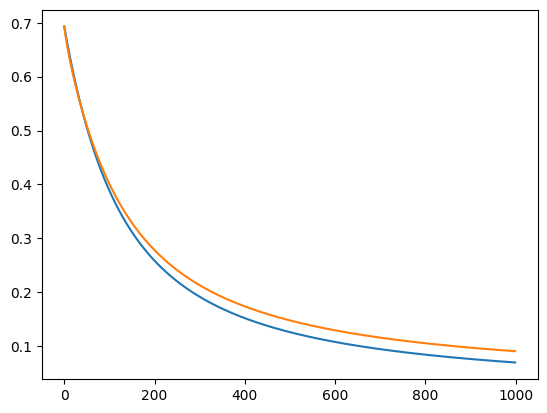

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)

##【問題7】決定領域の可視化

In [62]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,bias=True,verbose=True,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

0回目の学習の損失は0.6931471806273211
1回目の学習の損失は0.6930396234092083
2回目の学習の損失は0.6929330301685522
3回目の学習の損失は0.6928273816719996
4回目の学習の損失は0.6927226590726682
5回目の学習の損失は0.6926188439024407
6回目の学習の損失は0.6925159180644145
7回目の学習の損失は0.6924138638254914
8回目の学習の損失は0.6923126638091213
9回目の学習の損失は0.6922123009881785
10回目の学習の損失は0.6921127586779847
11回目の学習の損失は0.6920140205294668
12回目の学習の損失は0.6919160705224455
13回目の学習の損失は0.6918188929590618
14回目の学習の損失は0.6917224724573267
15回目の学習の損失は0.6916267939448023
16回目の学習の損失は0.6915318426524047
17回目の学習の損失は0.6914376041083308
18回目の学習の損失は0.6913440641321031
19回目の学習の損失は0.6912512088287338
20回目の学習の損失は0.6911590245830015
21回目の学習の損失は0.6910674980538457
22回目の学習の損失は0.6909766161688671
23回目の学習の損失は0.6908863661189394
24回目の学習の損失は0.6907967353529282
25回目の学習の損失は0.6907077115725132
26回目の学習の損失は0.6906192827271133
27回目の学習の損失は0.6905314370089143
28回目の学習の損失は0.6904441628479906
29回目の学習の損失は0.6903574489075319
30回目の学習の損失は0.6902712840791556
31回目の学習の損失は0.6901856574783184
32回目の学習の損失は0.690100558439819
33回目の学習の損失は0.69001597

In [70]:
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01),
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('sepal width')
    plt.ylabel('petal length')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='y')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='versicolor')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='virginica')
    plt.legend()
    plt.show()


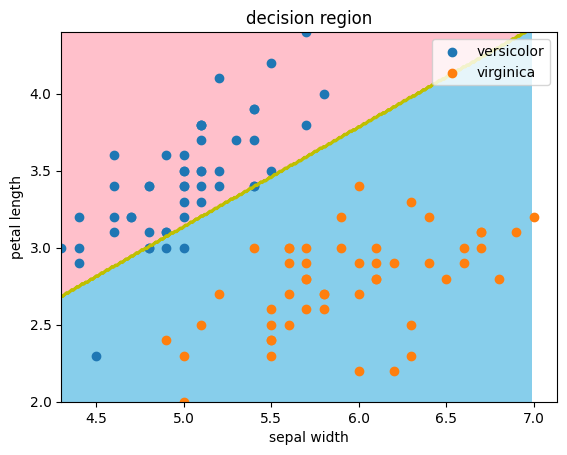

In [71]:
decision_region(X,y,slr)